In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
data = pd.read_csv('Dallas_Dataset_Redfin.csv')
data.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,8831 Lanarkshire Dr,Dallas,TX,75238.0,389000.0,3.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/TX/Dallas/8831-Lanarkshi...,NTREIS,14303138,N,Y,32.869210,-96.706821
1,MLS Listing,NaN,Single Family Residential,3938 Lively Ln,Dallas,TX,75220.0,895000.0,3.0,3.5,...,Active,NaN,NaN,http://www.redfin.com/TX/Dallas/3938-Lively-Ln...,NTREIS,14317268,N,Y,32.873320,-96.848648
2,MLS Listing,NaN,Single Family Residential,11152 Carissa Dr,Dallas,TX,75218.0,449000.0,4.0,2.5,...,Active,NaN,NaN,http://www.redfin.com/TX/Dallas/11152-Carissa-...,NTREIS,14317184,N,Y,32.861217,-96.689021
3,MLS Listing,NaN,Single Family Residential,10539 Estate Ln,Dallas,TX,75238.0,405000.0,4.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/TX/Dallas/10539-Estate-L...,NTREIS,14310299,N,Y,32.883066,-96.702906
4,MLS Listing,NaN,Single Family Residential,12230 Pleasant Valley Dr,Dallas,TX,75243.0,342000.0,4.0,3.0,...,Active,NaN,NaN,http://www.redfin.com/TX/Dallas/12230-Pleasant...,NTREIS,14306369,N,Y,32.914231,-96.723602


In [76]:
print("There are {} rows and {} features".format(data.shape[0],data.shape[1]))

There are 4098 rows and 27 features


In [77]:
#### Lets check whether there are any null values or not

data.isna().sum()

SALE TYPE                                                                                        0
SOLD DATE                                                                                     4098
PROPERTY TYPE                                                                                    1
ADDRESS                                                                                         17
CITY                                                                                             1
STATE OR PROVINCE                                                                                1
ZIP OR POSTAL CODE                                                                               1
PRICE                                                                                            1
BEDS                                                                                             3
BATHS                                                                                          410
LOCATION  

Seeing the above data, we can drop some of the features that are not important to us:-?

1. SOLD DATE --> This whole data is empty, so we can remove this
2. LATITUDE AND LONGITUDE :--> As we are not much concerned about lat and long
3. URL --> Remove this
4. NEXT OPEN HOUSE START TIME AND NEXT OPEN HOUSE END TIME :--> More than 90% of the values are NULL, so drop them
5. SALE TYPE : We are more interested in the type of Property,not how they are listed
6. ADDRESS --> Drop it
7. CITY, STATE OR PROVINCE, ZIP OR POSTAL,LOCATION :--> They all will remain the same, as we are dealing with Dallas only.
8. LOT SIZE :-- Drop this one also, as we will be more interested in Square feet
9. DAYS ON MARKET :--> As we can calculate the age of the property
10. /SQUARE FEET : As we are already given the price of property 
11. MLS# :--> Not much use for us
12. FAVORITE, STATUS AND INTERESTED :--> Not a good predictors for us.


In [78]:
data.drop(['SALE TYPE','SOLD DATE','ADDRESS','CITY','STATE OR PROVINCE','ZIP OR POSTAL CODE','LOCATION','LOT SIZE','NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME','URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)','SOURCE'],axis=1,inplace=True)

In [79]:
data.isna().sum()

PROPERTY TYPE        1
PRICE                1
BEDS                 3
BATHS              410
SQUARE FEET        380
YEAR BUILT         451
DAYS ON MARKET     131
$/SQUARE FEET      380
HOA/MONTH         2664
STATUS               1
MLS#                 1
FAVORITE             1
INTERESTED           1
LATITUDE             1
LONGITUDE            1
dtype: int64

In [80]:
data.drop(['DAYS ON MARKET','$/SQUARE FEET','MLS#','FAVORITE','INTERESTED','STATUS'],axis=1,inplace=True)

In [81]:
data.head()

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,YEAR BUILT,HOA/MONTH,LATITUDE,LONGITUDE
0,Single Family Residential,389000.0,3.0,2.0,1468.0,1955.0,NaN,32.869210,-96.706821
1,Single Family Residential,895000.0,3.0,3.5,2674.0,2014.0,NaN,32.873320,-96.848648
2,Single Family Residential,449000.0,4.0,2.5,2049.0,1972.0,4.0,32.861217,-96.689021
3,Single Family Residential,405000.0,4.0,2.0,1923.0,1960.0,4.0,32.883066,-96.702906
4,Single Family Residential,342000.0,4.0,3.0,2350.0,1983.0,15.0,32.914231,-96.723602


In [82]:
### Now, we have the featues that would be useful for us. Now lets do some feature engineering :-->

data['AGE'] = 2020 - data['YEAR BUILT']

In [83]:
data.head()

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,YEAR BUILT,HOA/MONTH,LATITUDE,LONGITUDE,AGE
0,Single Family Residential,389000.0,3.0,2.0,1468.0,1955.0,NaN,32.869210,-96.706821,65.0
1,Single Family Residential,895000.0,3.0,3.5,2674.0,2014.0,NaN,32.873320,-96.848648,6.0
2,Single Family Residential,449000.0,4.0,2.5,2049.0,1972.0,4.0,32.861217,-96.689021,48.0
3,Single Family Residential,405000.0,4.0,2.0,1923.0,1960.0,4.0,32.883066,-96.702906,60.0
4,Single Family Residential,342000.0,4.0,3.0,2350.0,1983.0,15.0,32.914231,-96.723602,37.0


In [84]:
### Now, we can shift the PRICE, at the last column, as our PRICE is the target variable

data['price'] = data['PRICE']
data.drop('PRICE',axis=1,inplace=True)
data['PRICE'] = data['price']
data.drop('price',axis=1,inplace=True)

In [85]:
data.head()

,PROPERTY TYPE,BEDS,BATHS,SQUARE FEET,YEAR BUILT,HOA/MONTH,LATITUDE,LONGITUDE,AGE,PRICE
0,Single Family Residential,3.0,2.0,1468.0,1955.0,NaN,32.869210,-96.706821,65.0,389000.0
1,Single Family Residential,3.0,3.5,2674.0,2014.0,NaN,32.873320,-96.848648,6.0,895000.0
2,Single Family Residential,4.0,2.5,2049.0,1972.0,4.0,32.861217,-96.689021,48.0,449000.0
3,Single Family Residential,4.0,2.0,1923.0,1960.0,4.0,32.883066,-96.702906,60.0,405000.0
4,Single Family Residential,4.0,3.0,2350.0,1983.0,15.0,32.914231,-96.723602,37.0,342000.0


### Now, lets check the null values in our dataset

In [86]:
data.isna().sum()

PROPERTY TYPE       1
BEDS                3
BATHS             410
SQUARE FEET       380
YEAR BUILT        451
HOA/MONTH        2664
LATITUDE            1
LONGITUDE           1
AGE               451
PRICE               1
dtype: int64

In [87]:
data.shape

(4098, 10)

In [88]:
data.dropna(how='all',inplace=True)

In [89]:
data.shape
## We have removed one column in which all the columns were Null

(4097, 10)

In [90]:
data['PROPERTY TYPE'].unique()

array(['Single Family Residential', 'Townhouse', 'Condo/Co-op',
       'Vacant Land', 'Multi-Family (2-4 Unit)', 'Multi-Family (5+ Unit)',
       'Ranch'], dtype=object)

In [91]:
data['PROPERTY TYPE'].value_counts()

Single Family Residential    2575
Condo/Co-op                   822
Vacant Land                   373
Townhouse                     198
Multi-Family (2-4 Unit)       100
Multi-Family (5+ Unit)         25
Ranch                           4
Name: PROPERTY TYPE, dtype: int64

In [92]:
data.drop('YEAR BUILT',axis=1,inplace=True)

In [93]:
data.loc[data['PROPERTY TYPE'] == "Ranch",:]
### So,its better to delete RANCH property type from our dataset, as there is no information.

,PROPERTY TYPE,BEDS,BATHS,SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,AGE,PRICE
3074,Ranch,0.0,NaN,NaN,NaN,32.641633,-96.748809,NaN,369000.0
3283,Ranch,0.0,NaN,NaN,NaN,32.674033,-96.640879,NaN,1000000.0
3469,Ranch,0.0,NaN,NaN,NaN,32.690009,-96.659917,NaN,4500000.0
3896,Ranch,0.0,NaN,NaN,NaN,32.968535,-96.513775,NaN,11000000.0


In [94]:
data.loc[data['PROPERTY TYPE'] =="Vacant Land",:]
#Similarily for this also, we can remove the property type which is "Vacant Land"

,PROPERTY TYPE,BEDS,BATHS,SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,AGE,PRICE
29,Vacant Land,0.0,NaN,NaN,NaN,32.917304,-96.794432,NaN,635000.0
44,Vacant Land,0.0,NaN,NaN,NaN,32.816198,-96.796379,80.0,1200000.0
51,Vacant Land,0.0,NaN,NaN,NaN,32.770072,-96.838795,NaN,330000.0
82,Vacant Land,0.0,NaN,NaN,NaN,32.756904,-96.770586,NaN,29500.0
107,Vacant Land,0.0,NaN,NaN,NaN,32.725605,-96.983336,NaN,50000.0
130,Vacant Land,0.0,NaN,NaN,NaN,32.766534,-96.757225,NaN,29900.0
132,Vacant Land,0.0,NaN,NaN,NaN,32.755469,-96.763711,NaN,39900.0
134,Vacant Land,0.0,NaN,NaN,NaN,32.762926,-96.769722,NaN,44900.0
135,Vacant Land,0.0,NaN,NaN,NaN,32.713739,-96.793476,NaN,90000.0
151,Vacant Land,0.0,NaN,NaN,NaN,32.753749,-96.769706,NaN,39900.0


### Lets drop them first

In [95]:
data.set_index('PROPERTY TYPE',inplace=True)

In [96]:
data.head()

,BEDS,BATHS,SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,AGE,PRICE
PROPERTY TYPE,,,,,,,,
Single Family Residential,3.0,2.0,1468.0,NaN,32.869210,-96.706821,65.0,389000.0
Single Family Residential,3.0,3.5,2674.0,NaN,32.873320,-96.848648,6.0,895000.0
Single Family Residential,4.0,2.5,2049.0,4.0,32.861217,-96.689021,48.0,449000.0
Single Family Residential,4.0,2.0,1923.0,4.0,32.883066,-96.702906,60.0,405000.0
Single Family Residential,4.0,3.0,2350.0,15.0,32.914231,-96.723602,37.0,342000.0


In [97]:
data.drop('Ranch',inplace=True)

In [98]:
data.drop('Vacant Land',inplace=True)

In [99]:
data.shape

(3720, 8)

In [100]:
data.head()

,BEDS,BATHS,SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,AGE,PRICE
PROPERTY TYPE,,,,,,,,
Single Family Residential,3.0,2.0,1468.0,NaN,32.869210,-96.706821,65.0,389000.0
Single Family Residential,3.0,3.5,2674.0,NaN,32.873320,-96.848648,6.0,895000.0
Single Family Residential,4.0,2.5,2049.0,4.0,32.861217,-96.689021,48.0,449000.0
Single Family Residential,4.0,2.0,1923.0,4.0,32.883066,-96.702906,60.0,405000.0
Single Family Residential,4.0,3.0,2350.0,15.0,32.914231,-96.723602,37.0,342000.0


In [101]:
data.reset_index(inplace=True)

In [102]:
data.head()

,PROPERTY TYPE,BEDS,BATHS,SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,AGE,PRICE
0,Single Family Residential,3.0,2.0,1468.0,NaN,32.869210,-96.706821,65.0,389000.0
1,Single Family Residential,3.0,3.5,2674.0,NaN,32.873320,-96.848648,6.0,895000.0
2,Single Family Residential,4.0,2.5,2049.0,4.0,32.861217,-96.689021,48.0,449000.0
3,Single Family Residential,4.0,2.0,1923.0,4.0,32.883066,-96.702906,60.0,405000.0
4,Single Family Residential,4.0,3.0,2350.0,15.0,32.914231,-96.723602,37.0,342000.0


In [103]:
data.isna().sum()

PROPERTY TYPE       0
BEDS                0
BATHS              32
SQUARE FEET         2
HOA/MONTH        2313
LATITUDE            0
LONGITUDE           0
AGE               130
PRICE               0
dtype: int64

### So, far we are almost done with the feature engineering. Now, lets fill the Null values. First try out with the median  imputation of each model and see how it works

In [104]:
data['BATHS'].median()

2.5

In [105]:
data['SQUARE FEET'].median()

2000.0

In [106]:
data['BATHS'] = data['BATHS'].fillna(value = data['BATHS'].median())

In [107]:
data['SQUARE FEET'] = data['SQUARE FEET'].fillna(value = data['SQUARE FEET'].median())

In [108]:
data['HOA/MONTH'] = data['HOA/MONTH'].fillna(value = data['HOA/MONTH'].median())

In [109]:
data['AGE'] = data['AGE'].fillna(value = data['AGE'].median())

In [110]:
data.isna().sum()

PROPERTY TYPE    0
BEDS             0
BATHS            0
SQUARE FEET      0
HOA/MONTH        0
LATITUDE         0
LONGITUDE        0
AGE              0
PRICE            0
dtype: int64

In [111]:
### So, now we are all set for further data exploration. Now lets see the heat maps and see how it works

import seaborn as sns

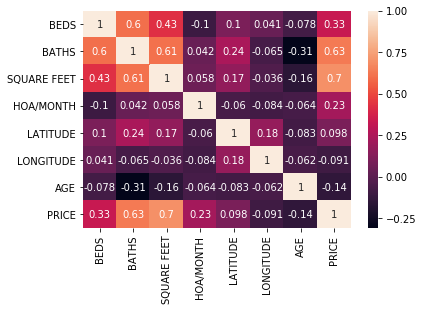

In [112]:
fig,ax = plt.subplots()
sns.heatmap(data.corr(),annot=True,ax=ax)

### from the above heatmap, we can see that there are no variables, that have very high correlation, so no need to drop any more features

In [113]:
data.groupby('PROPERTY TYPE').mean()

,BEDS,BATHS,SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,AGE,PRICE
PROPERTY TYPE,,,,,,,,
Condo/Co-op,1.903893,2.016423,1482.136253,623.864964,32.840179,-96.784203,31.855231,4.708605e+05
Multi-Family (2-4 Unit),3.750000,2.965000,3008.150000,246.510000,32.816296,-96.788314,40.770000,7.609890e+05
Multi-Family (5+ Unit),6.320000,4.220000,14103.760000,250.000000,32.797113,-96.775756,61.760000,2.549929e+06
Single Family Residential,3.535922,2.898447,2801.445437,232.215146,32.832406,-96.771515,41.885437,8.062642e+05
Townhouse,2.626263,2.765152,2095.383838,242.161616,32.833988,-96.783787,18.449495,4.886657e+05


### Now what I have to do it to convert the property types to the ONE-HOT ENCODING

In [114]:
### Now lets convert them PROPERTY TYPE to each column, using get_dummies method()

cat_columns = ['PROPERTY TYPE']
data_processed = pd.get_dummies(data,prefix_sep='_',columns=cat_columns)

In [115]:
data_processed.head()

# FROM the below,we can see that we have successfully converted the column PROPERTY_TYPE

,BEDS,BATHS,SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,AGE,PRICE,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Multi-Family (5+ Unit),PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse
0,3.0,2.0,1468.0,250.0,32.869210,-96.706821,65.0,389000.0,0,0,0,1,0
1,3.0,3.5,2674.0,250.0,32.873320,-96.848648,6.0,895000.0,0,0,0,1,0
2,4.0,2.5,2049.0,4.0,32.861217,-96.689021,48.0,449000.0,0,0,0,1,0
3,4.0,2.0,1923.0,4.0,32.883066,-96.702906,60.0,405000.0,0,0,0,1,0
4,4.0,3.0,2350.0,15.0,32.914231,-96.723602,37.0,342000.0,0,0,0,1,0


So, this is our Multiple Linear Regression Problem,So,now we need to calculate w's for all features and then we can calculate yhat(predicted y values).Lets first find out the value of w without any Regularization


In [116]:
data_processed.head()

,BEDS,BATHS,SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,AGE,PRICE,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Multi-Family (5+ Unit),PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse
0,3.0,2.0,1468.0,250.0,32.869210,-96.706821,65.0,389000.0,0,0,0,1,0
1,3.0,3.5,2674.0,250.0,32.873320,-96.848648,6.0,895000.0,0,0,0,1,0
2,4.0,2.5,2049.0,4.0,32.861217,-96.689021,48.0,449000.0,0,0,0,1,0
3,4.0,2.0,1923.0,4.0,32.883066,-96.702906,60.0,405000.0,0,0,0,1,0
4,4.0,3.0,2350.0,15.0,32.914231,-96.723602,37.0,342000.0,0,0,0,1,0


In [117]:
X_values = data_processed.drop('PRICE',axis=1)
Y_values = data_processed['PRICE']

In [118]:
X_values = X_values.as_matrix()

C:\Users\karan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [119]:
Y_values  = Y_values.as_matrix()

C:\Users\karan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


One thing to note here is that, we know that the equation is of the form w0 + w1 * x1 + w2*x2 + ....., so we can assume that for w0, x0=1 and so on we can append the 1,to each row.

In [125]:
N = X_values.shape[0]
print("The nunmber of rows are :",N)
print("The shape of X_values before appending 1 is :",X_values.shape)

The nunmber of rows are : 3720
The shape of X_values before appending 1 is : (3720, 12)


In [126]:
### Now append 1 to X_values
X_values = np.append(arr = np.ones((N,1)).astype(int),values=X_values,axis=1)

In [127]:
print("The shape of X_values after appending 1 is :",X_values.shape)

The shape of X_values after appending 1 is : (3720, 13)


In [128]:
### Now, we can converted our X and Y values into numpy matrix. So now calculate the value of w's

w = np.linalg.solve(np.dot(X_values.T,X_values),np.dot(X_values.T,Y_values))

In [129]:
Yhat = X_values.dot(w)

In [130]:
### Now lets calculate the value of R-squared

d1 = Y_values - Yhat
d2 = Y_values - Y_values.mean()

r2 = 1 - (d1.dot(d1) / d2.dot(d2))
print("R-squared value of our model is :",r2)

# This value is OK, we will further try to add Regularization and see how it works.

R-squared value of our model is : 0.6156075218263659


In [131]:
data['PRICE'].skew()

6.280506223236483

In [132]:
data['PRICE'].mean()

725747.4284946236

(array([1.012e+03, 1.059e+03, 6.850e+02, 2.750e+02, 1.350e+02, 8.400e+01,
        8.400e+01, 5.100e+01, 4.600e+01, 3.900e+01, 2.300e+01, 2.800e+01,
        2.200e+01, 1.900e+01, 1.300e+01, 1.900e+01, 1.500e+01, 7.000e+00,
        9.000e+00, 1.400e+01, 5.000e+00, 5.000e+00, 6.000e+00, 3.000e+00,
        2.000e+00, 5.000e+00, 3.000e+00, 4.000e+00, 4.000e+00, 1.000e+00,
        5.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 4.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 5.000e+00, 0.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

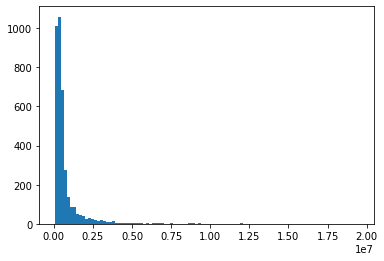

In [133]:
plt.hist(data['PRICE'],bins=100)
## We can see that our data is skewed. So,we need to handle this thing as well.

### One thing we can do is take the log_transformation of the Price

### So, we have seen that the data is skewed. So, to counter this, we can take the log values of PRICE and check does it works....

In [134]:
Y_values_log = np.log(Y_values)

In [135]:
type(Y_values_log)

numpy.ndarray

In [136]:
w = np.linalg.solve(np.dot(X_values.T,X_values),np.dot(X_values.T,Y_values_log))

In [163]:
yhat_log = X_values.dot(w)

In [164]:
d1 = Y_values_log - yhat_log 
d2 = Y_values_log - Y_values_log.mean()

In [169]:
r2_new = 1 - (d1.dot(d1) 
              / d2.dot(d2) )


## Here d1.dot(d1) is my mean squared values
## d2 gives us the difference of a point from a mean values

In [170]:
r2_new

0.7123049208386847

### So, we can see that we have significantly improved the R-squared value using log,which is around 71.23%

#### Now Lets check the model performance using Scikit Learn libraries

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,r2_score

In [142]:
X_train,X_test,Y_train,Y_test = train_test_split(X_values,Y_values_log,random_state=42)

In [143]:
print("The shape of X_train is :",X_train.shape)
print("The shape of X_test is :",X_test.shape)
print("The shape of Y_train is :",Y_train.shape)
print("The shape of Y_test is :",Y_test.shape)

The shape of X_train is : (2790, 13)
The shape of X_test is : (930, 13)
The shape of Y_train is : (2790,)
The shape of Y_test is : (930,)


In [144]:
linear_reg = LinearRegression()

In [145]:
### Lets first fit the model to it :--> using our training set
linear_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
### Now, lets predict the values using testing set
y_pred = linear_reg.predict(X_test)

Till noe, what we have done is we have add ones to X_values, also we split the data into train/test and also we have run our regression model.Now,we lets do the MODEL EVALUATION

In [157]:
r2_score(Y_test,y_pred)

0.717084931206502

### So, we can see that the model has the R-squared value if 71.7%